In [34]:
import sys
sys.path.append("..")
import importlib
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import system.tunable_full_cosine as full_system
importlib.reload(full_system)
import system.tunable_truncated_power_series as truncated_system
importlib.reload(truncated_system)
import system.experimental_september as fixed_truncated_system
import utils.solver as solver
importlib.reload(solver)
import pulse.tukey as tukey
importlib.reload(tukey)
import pulse.tukey_derivative as tukey_derivative
importlib.reload(tukey_derivative)
import utils.expectation_values as expect
importlib.reload(expect)
import optimization.grape as grape
importlib.reload(grape)
import utils.graph as graph
importlib.reload(graph)

pass

In [115]:
basis_size = 100
full_system.setup(_E_c = full_system.E_c, _E_j = full_system.E_j, _basis_size=basis_size)
truncated_system.setup(_omega= truncated_system.omega, _anharm=truncated_system.anharm, _basis_size=basis_size)

24.951596996312357 0.0 -36.149348062641096 -61.10094504266374
8.217198993340881 8.217198998770787 8.217198998770787


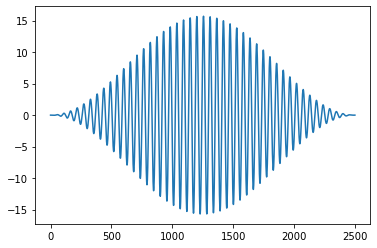

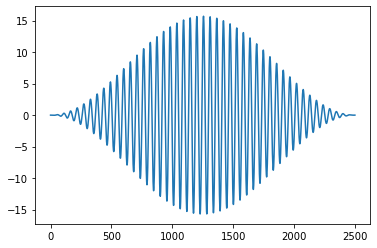

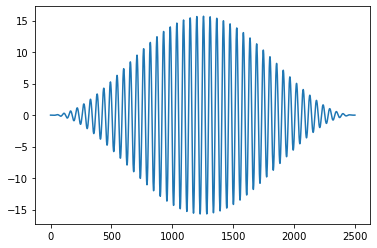

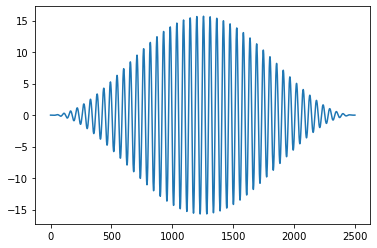

In [36]:
amplitude = 2.5*(2*np.pi)
duration = 25
offset = 0.1
drive_frequency_from_full = (full_system.energies[1] - full_system.energies[0])/3 - offset
drive_frequency_from_truncated = (truncated_system.energies[1] - truncated_system.energies[0])/3 - offset
drive_frequency_from_fixed_truncated = (fixed_truncated_system.energies[1] - fixed_truncated_system.energies[0])/3 - offset
tlist = np.linspace(0, duration+10, duration*100)
print(truncated_system.energies[1], truncated_system.energies[0], full_system.energies[1], full_system.energies[0])
print(drive_frequency_from_full, drive_frequency_from_truncated, drive_frequency_from_fixed_truncated)


tukey.setup(amplitude, drive_frequency_from_full, 1, tlist)
plt.plot(tukey.get_pulse(tlist))
plt.show()
full_solution = solver.time_evolve(H_d = full_system.H0, H_c=full_system.H1, pertubation_func=tukey.pulse_func, tlist=tlist, starting_state=full_system.starting_state, pbar=True)
plt.plot(tukey.get_pulse(tlist))
plt.show()

tukey.setup(amplitude, drive_frequency_from_truncated, 1, tlist)
plt.plot(tukey.get_pulse(tlist))
plt.show()
truncated_solution = solver.time_evolve(H_d = truncated_system.H0, H_c=truncated_system.H1, pertubation_func=tukey.pulse_func, tlist=tlist, starting_state=truncated_system.starting_state, pbar=True)
plt.plot(tukey.get_pulse(tlist))
plt.show()

In [109]:
full_system.energies

array([-61.10094532, -36.14927993, -12.50263169,  -6.94030908,
         9.70268449,  15.31043659,  30.2670386 ,  48.70439778,
        49.46985212,  63.14083931,  66.46680583,  75.89680053,
        87.84778368,  88.22981369, 106.90740439, 109.4256744 ,
       131.85534065, 134.47124411, 161.04718672, 163.78977724,
       194.5781896 , 197.3527974 , 232.60237056, 235.3019157 ,
       275.38601629, 277.87681202, 323.30469218, 325.40790141,
       376.86476568, 378.3310724 , 436.75014623, 437.22034768,
       502.84590975, 503.90926565, 576.29378617, 579.72317455,
       659.09668247, 666.37327917, 754.48441047, 767.77135638,
       860.70027146, 895.01004724])

In [119]:
import qutip
basis_size = 100
full_system.setup(_E_c = full_system.E_c, _E_j = full_system.E_j, _basis_size=basis_size)
truncation_size = 8
qutip.Qobj(full_system.H0.data[:truncation_size,:truncation_size]).eigenenergies() - qutip.Qobj(full_system.H0.data[:truncation_size,:truncation_size]).eigenenergies()[0]

array([  0.        ,  24.95173326,  48.60425442,  70.84020224,
        92.2191509 , 112.22571384, 138.08767751, 159.72114461])

In [123]:
import qutip
basis_size = 100
full_system.setup(_E_c = full_system.E_c, _E_j = full_system.E_j, _basis_size=basis_size)
truncation_size = 20
qutip.Qobj(full_system.H0.data[:truncation_size,:truncation_size]).eigenenergies() - qutip.Qobj(full_system.H0.data[:truncation_size,:truncation_size]).eigenenergies()[0]

array([  0.        ,  24.95166539,  48.59831381,  70.80363684,
        91.36848726, 109.95937054, 126.00348818, 138.51866278,
       150.11179272, 160.22216788, 177.96932502, 191.91486669,
       217.01087639, 233.63514116, 266.88647572, 285.86541152,
       329.96599041, 351.21240176, 409.15008324, 432.63539573])

In [124]:
import qutip
basis_size = 100
full_system.setup(_E_c = full_system.E_c, _E_j = full_system.E_j, _basis_size=basis_size)
truncation_size = 30
qutip.Qobj(full_system.H0.data[:truncation_size,:truncation_size]).eigenenergies() - qutip.Qobj(full_system.H0.data[:truncation_size,:truncation_size]).eigenenergies()[0]

array([  0.        ,  24.95166539,  48.59831363,  70.80362982,
        91.36794721, 109.94189454, 125.11479736, 125.7211976 ,
       130.71409987, 140.11807563, 152.57954863, 161.54966845,
       176.73161293, 187.75541133, 207.37193709, 220.29287157,
       244.26661882, 258.87273917, 287.72192445, 303.93552168,
       338.42165969, 356.19920064, 397.44626597, 416.77091793,
       466.49125985, 487.37187755, 548.72228318, 571.202849  ,
       647.28365873, 671.41855477])

In [125]:
import qutip
basis_size = 1000
full_system.setup(_E_c = full_system.E_c, _E_j = full_system.E_j, _basis_size=basis_size)
truncation_size = 30
qutip.Qobj(full_system.H0.data[:truncation_size,:truncation_size]).eigenenergies() - qutip.Qobj(full_system.H0.data[:truncation_size,:truncation_size]).eigenenergies()[0]

array([  0.        ,  24.95166539,  48.59831363,  70.80362982,
        91.36794721, 109.94189454, 125.11479736, 125.7211976 ,
       130.71409987, 140.11807563, 152.57954863, 161.54966845,
       176.73161293, 187.75541133, 207.37193709, 220.29287157,
       244.26661882, 258.87273917, 287.72192445, 303.93552168,
       338.42165969, 356.19920064, 397.44626597, 416.77091793,
       466.49125985, 487.37187755, 548.72228318, 571.202849  ,
       647.28365873, 671.41855477])

In [96]:
truncated_system.energies + -truncated_system.energies[0]

array([  0.        ,  24.951597  ,  48.59924455,  70.94294265,
        91.9826913 , 111.71849051, 130.15034028, 147.27824059,
       163.10219146, 177.62219288])

In [110]:
qutip.Qobj(truncated_system.H0.data[:10,:10]).eigenenergies()

array([  0.        ,  24.951597  ,  48.59924455,  70.94294265,
        91.9826913 , 111.71849051, 130.15034028, 147.27824059,
       163.10219146, 177.62219288])

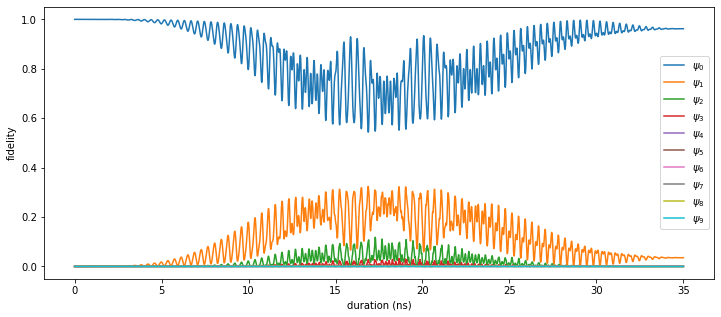

In [43]:
graph.graph_solution(full_solution, full_system)

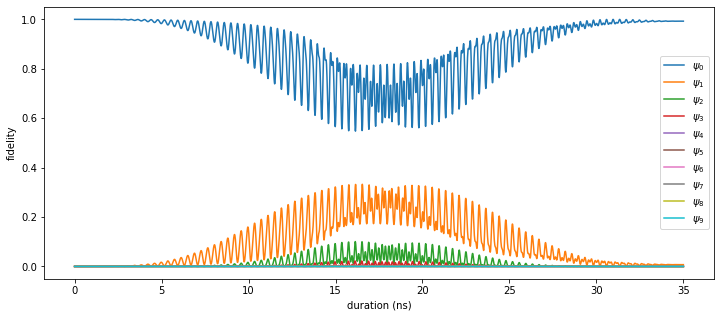

In [44]:
graph.graph_solution(truncated_solution, truncated_system)

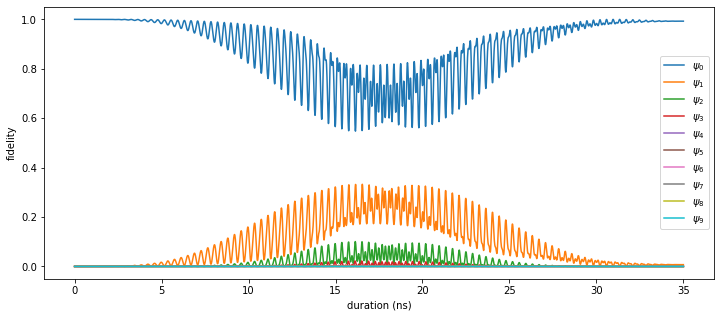

In [70]:
tukey.setup(amplitude, drive_frequency_from_fixed_truncated, 1, tlist)
fixed_solution = solver.time_evolve(H_d = fixed_truncated_system.H0, H_c=fixed_truncated_system.H1, pertubation_func=tukey.pulse_func, tlist=tlist, starting_state=fixed_truncated_system.starting_state, pbar=True)
graph.graph_solution(fixed_solution, fixed_truncated_system)

# Both system breaks down at higher hilbert spaces: NOT GOOD

In [78]:
basis_size = 42
full_system.setup(_E_c = full_system.E_c, _E_j = full_system.E_j, _basis_size=basis_size)
truncated_system.setup(_omega= truncated_system.omega, _anharm=truncated_system.anharm, _basis_size=basis_size)
solver.set_tolerances()

truncated_system.energies[1] -19.016688650709852 truncated_system.energies[0] -46.22306952635654 full_system.energies[1] -36.14927992900117 full_system.energies[0] -61.1009453204023
drive_frequency_from_full 8.217221797133712 drive_frequency_from_truncated 8.968793625215563 drive_frequency_from_fixed_truncated 8.217198998770787


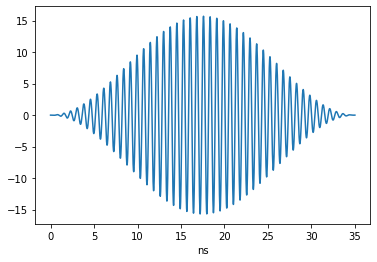

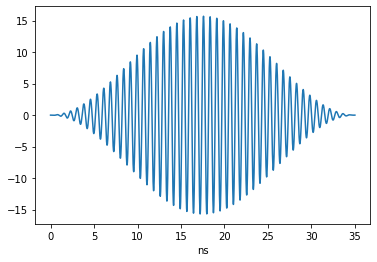

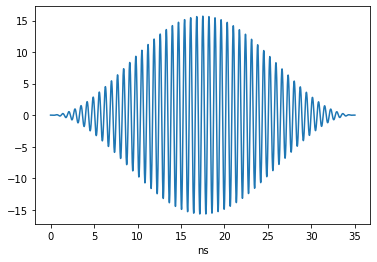

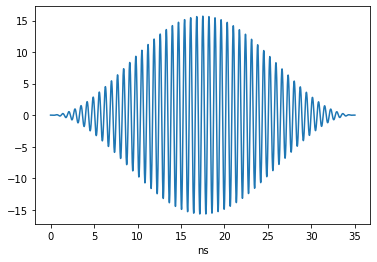

In [79]:
amplitude = 2.5*(2*np.pi)
duration = 25
offset = 0.1
drive_frequency_from_full = (full_system.energies[1] - full_system.energies[0])/3 - offset
drive_frequency_from_truncated = (truncated_system.energies[1] - truncated_system.energies[0])/3 - offset
drive_frequency_from_fixed_truncated = (fixed_truncated_system.energies[1] - fixed_truncated_system.energies[0])/3 - offset
tlist = np.linspace(0, duration+10, duration*100)
print("truncated_system.energies[1]", truncated_system.energies[1], "truncated_system.energies[0]", truncated_system.energies[0], "full_system.energies[1]", full_system.energies[1], "full_system.energies[0]", full_system.energies[0])
print("drive_frequency_from_full", drive_frequency_from_full, "drive_frequency_from_truncated", drive_frequency_from_truncated, "drive_frequency_from_fixed_truncated", drive_frequency_from_fixed_truncated)


tukey.setup(amplitude, drive_frequency_from_full, 1, tlist)
plt.plot(tlist, tukey.get_pulse(tlist))
plt.xlabel("ns")
plt.show()
full_solution = solver.time_evolve(H_d = full_system.H0, H_c=full_system.H1, pertubation_func=tukey.pulse_func, tlist=tlist, starting_state=full_system.starting_state, pbar=True)
plt.plot(tlist, tukey.get_pulse(tlist))
plt.xlabel("ns")
plt.show()

tukey.setup(amplitude, drive_frequency_from_truncated, 1, tlist)
plt.plot(tlist, tukey.get_pulse(tlist))
plt.xlabel("ns")
plt.show()
truncated_solution = solver.time_evolve(H_d = truncated_system.H0, H_c=truncated_system.H1, pertubation_func=tukey.pulse_func, tlist=tlist, starting_state=truncated_system.starting_state, pbar=True)
plt.plot(tlist, tukey.get_pulse(tlist))
plt.xlabel("ns")
plt.show()

In [80]:
full_system.H0

Quantum object: dims = [[42], [42]], shape = (42, 42), type = oper, isherm = True
Qobj data =
[[ -61.08569918    0.           -0.78395871 ...    0.
     0.            0.        ]
 [   0.          -36.02578647    0.         ...    0.
     0.            0.        ]
 [  -0.78395871    0.          -12.02620119 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...  509.74794108
     0.         -240.47175019]
 [   0.            0.            0.         ...    0.
   564.01815498    0.        ]
 [   0.            0.            0.         ... -240.47175019
     0.          278.16726487]]

In [81]:
truncated_system.H0

Quantum object: dims = [[42], [42]], shape = (42, 42), type = oper, isherm = True
Qobj data =
[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.          24.951597     0.         ...   0.           0.
    0.        ]
 [  0.           0.          48.59924455 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...   6.88574278   0.
    0.        ]
 [  0.           0.           0.         ...   0.         -19.01668865
    0.        ]
 [  0.           0.           0.         ...   0.           0.
  -46.22306953]]

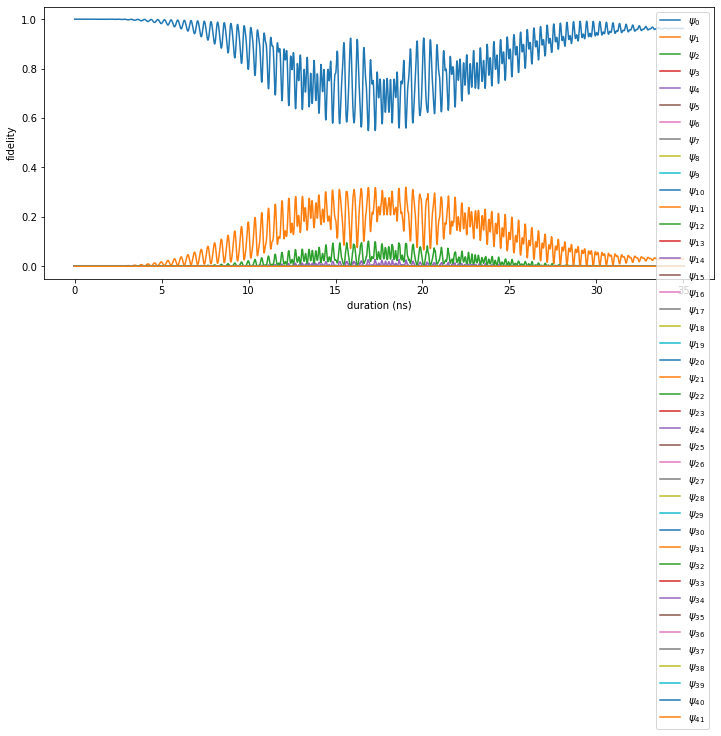

In [82]:
graph.graph_solution(full_solution, full_system)

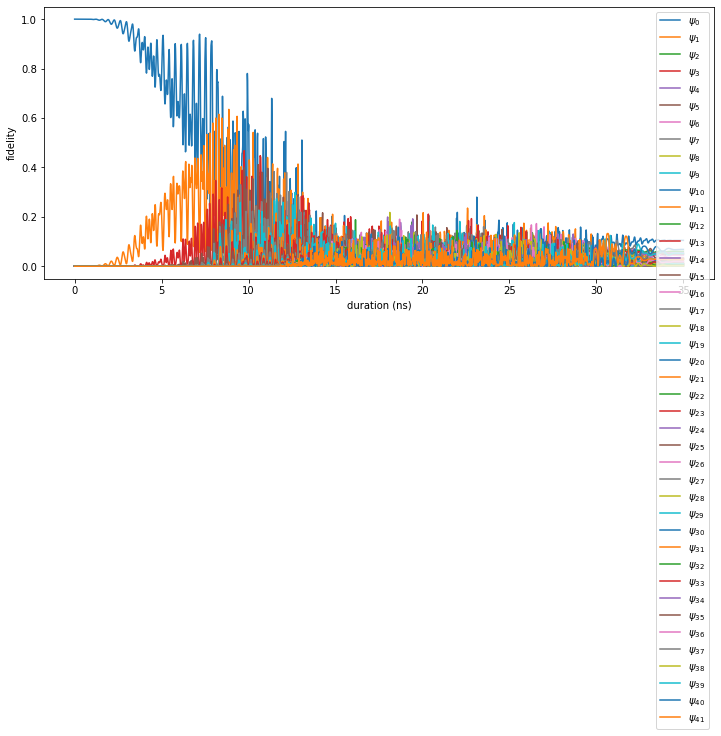

In [83]:
graph.graph_solution(truncated_solution, truncated_system)